<p style="font-weight: bold;text-align: center;font-size: 3em;color: #00338D">What can you do with pyESASky?</p>

This notebook shows examples of what a scientist may typically want to do within a Jupyter notebook using pyESASky, e.g:
* Download and inspect data from ESASky (images, spectra, catalogues, ...)
* Cross-match catalogues available through ESASky
* Upload your own data to ESASky, e.g.: 
  * Cross-matched tables
  * Vizier catalogues (astropy tables) 
  * User provided tables
  * Footprints
  * HiPS
* Interact with ESASky Functionalities:
  * Set the: FoV, HiPS
  * Go to a target or coordinates
  * Slide through a selection of HiPS
  * See the observations, catalogues and publications count in the current FoV
  * Load the data panel for observations, spectra and catalogues accessible in ESASky
  * JWST planning tool
  * Set the coordinates grid on and off

In [1]:
# Import the required python modules:
from pyesasky import ESASkyWidget
from pyesasky import Catalogue
from pyesasky import CatalogueDescriptor
from pyesasky import CooFrame
from pyesasky import ImgFormat
from pyesasky import FootprintSet
from pyesasky import FootprintSetDescriptor
from pyesasky import MetadataDescriptor
from pyesasky import MetadataType

import pandas as pd

In [2]:
# Instantiate the pyESASky instance
esasky = ESASkyWidget('En')
#Es and Zh are available for Spanish or Mandarin

All of the functions are now documented. Use the IPython ? magic to read about the function. Use tab to complete function names etc:

In [3]:
?ESASkyWidget.goToRADec

Signature: ESASkyWidget.goToRADec(self, ra, dec)
Docstring:
Moves the center of the view to the specified coordinate 
in current coordinate system

Arguments:
ra -- float or string in sexagesimal or decimal format
dec -- float or string in sexagesimal or decimal format
File:      ~/anaconda3/lib/python3.7/site-packages/pyesasky/pyesasky.py
Type:      function


In [3]:
# Load the pyESASky instance
esasky

ESASkyWidget(layout=Layout(align_self='stretch', height='400px'))

### Set custom height of the view

In [20]:
esasky.setViewHeight('1000px')

### Go to a target name resolved against SIMBAD

In [16]:
esasky.goToTargetName('COSMOS Field')

### Go to RA and Dec (decimal degrees or sexagesimal format)

In [13]:
esasky.goToRADec('190.11917', '+02.20583') #COSMOS Field

### Set the Field of View in degrees

In [14]:
esasky.setFoV(0.5)

### Change the background HiPS to Herschel PACS colour

In [15]:
esasky.setHiPS('Herschel PACS RGB 70, 160 micron')
# type the following to see the available HiPS from ESASky:
# esasky.getAvailableHiPS()

<br />
<p style="font-weight: bold;text-align: center;font-size: 2.5em;color: #00338D">Download and inspect data from ESASky</p>

### Information about the available data in the current field of view can be retrieved. For example the number of sources per catalogue:

In [18]:
catCount = esasky.getCataloguesCount()
catCount = pd.DataFrame.from_dict([catCount]).transpose()
catCount.columns = ['Count']
catCount

,Count
LAMOST,86
AllWise,1853
AKARI-IRC-SC,0
2MASS,239
INTEGRAL,0
CHANDRA-SC2,274
XMM-EPIC-STACK,159
XMM-EPIC,554
XMM-OM,1197
XMM-SLEW,0


### Download sources from the XMM EPIC (3XMM-DR8) catalogue and Herschel PACS 100 micron Point Source Catalogue in the current field of view:

In [21]:
# Firstly, plot the 3XMM-DR8 catalogue in ESASky:
esasky.plotCatalogues('XMM-EPIC')

Catalogs from missionId: XMM-EPIC displayed in the ESASky


In [22]:
# then parse the data with pandas
data=esasky.getResultPanelData()
xmmepic = pd.DataFrame.from_dict(data).transpose()
xmmepic

,postcard_url,name,ra,dec,ep_8_flux,ep_8_flux_err,ep_2_flux,ep_2_flux_err,ep_3_flux,ep_3_flux_err,ep_4_flux,ep_4_flux_err,ep_5_flux,ep_5_flux_err,mjd_start
0,http://nxsa.esac.esa.int/nxsa-sl/servlet/data-...,4XMM J100002.7+021635,150.0112807904,2.276475167277,1.33832E-14,1.2297E-14,3.02972E-15,1.01625E-15,3.2435E-15,1.06306E-15,4.13274E-15,2.35396E-15,0.0,1.19296E-14,55715.2339814799998
1,http://nxsa.esac.esa.int/nxsa-sl/servlet/data-...,4XMM J100020.2+021726,150.0837473632,2.291077241209,9.74593E-14,6.83029E-14,1.80549E-15,1.00529E-15,3.63801E-15,1.74639E-15,7.52876E-15,5.51109E-15,8.19262E-14,6.80424E-14,53872.7568287000031
2,http://nxsa.esac.esa.int/nxsa-sl/servlet/data-...,4XMM J100024.2+021003,150.1011908405,2.168109542254,9.17045E-15,3.1098E-14,1.02688E-15,7.45904E-16,3.86987E-15,1.5771E-15,3.02251E-15,3.72394E-15,0.0,3.08175E-14,53699.8381134299998
3,http://nxsa.esac.esa.int/nxsa-sl/servlet/data-...,4XMM J100025.2+015852,150.1051909102,1.981025748409,7.96351E-13,9.62405E-14,6.38775E-14,4.08198E-15,8.67603E-14,5.80442E-15,9.04676E-14,1.17866E-14,4.97549E-13,9.51848E-14,53329.0477893499992
4,http://nxsa.esac.esa.int/nxsa-sl/servlet/data-...,4XMM J100025.3+020734,150.105551358,2.126335073965,4.38794E-14,6.4126E-15,2.68361E-15,4.18159E-16,6.25349E-15,6.66584E-16,9.67995E-15,1.44622E-15,2.30787E-14,6.15458E-15,52983.4904861100003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549,http://nxsa.esac.esa.int/nxsa-sl/servlet/data-...,4XMM J100000.6+021531,150.0061651529,2.25898277014,1.58341E-13,4.23716E-14,1.49864E-15,1.09178E-15,9.25666E-15,1.84942E-15,2.48216E-14,4.8408E-15,1.16524E-13,4.19977E-14,52983.4904861100003
550,http://nxsa.esac.esa.int/nxsa-sl/servlet/data-...,4XMM J100010.2+020348,150.0428835283,2.063550895886,2.94877E-14,1.87753E-14,1.37021E-15,7.78112E-16,6.44793E-15,1.60746E-15,6.05876E-15,2.64986E-15,1.09877E-14,1.84091E-14,52984.9551388899999
551,http://nxsa.esac.esa.int/nxsa-sl/servlet/data-...,4XMM J100051.8+015920,150.2163165016,1.988842640248,4.10785E-14,5.99167E-15,4.0225E-15,4.60143E-16,5.84562E-15,5.93378E-16,7.44096E-15,1.18422E-15,2.01637E-14,5.79325E-15,52983.0935069400002
552,http://nxsa.esac.esa.int/nxsa-sl/servlet/data-...,4XMM J100053.9+015951,150.2246159366,1.997654321961,1.7171E-15,1.95518E-15,1.79191E-18,5.91212E-17,3.15518E-17,9.06499E-17,1.47472E-16,2.79052E-16,0.0,1.89253E-15,55715.2339814799998


In [23]:
# Plot the Herschel-HPPSC-100 catalogue in ESASky:
esasky.plotCatalogues('Herschel-HPPSC-100')

Catalogs from missionId: Herschel-HPPSC-100 displayed in the ESASky


In [24]:
# then parse the data with pandas
data=esasky.getResultPanelData()
HPPSC100 = pd.DataFrame.from_dict(data).transpose()
HPPSC100

,name,ra,dec,flux,rms,fwhmxfit,fwhmyfit,snr,stn,elong_flag,edge_flag,blend_flag,warmat,ssomap_flag,obsid
0,HPPSC100A_J100029.1+022028,150.121485742354,2.34117695624495,1.994866,0.539128,8.48589978723793,5.81471906321345,1.752753,3.700171,0.68522,true,0,false,false,1342245939
1,HPPSC100A_J100046.0+023107,150.191760507631,2.51858006552276,2.090976,0.685504,7.25511083825166,-99.9,2.215749,3.050275,0,true,0,false,false,1342245939
2,HPPSC100A_J100041.8+022608,150.174283439663,2.43561175430237,2.174728,0.660995,8.60922380780221,-99.9,0.59721,3.290082,0,true,0,false,false,1342245939
3,HPPSC100A_J100042.4+021818,150.177023993468,2.3050843083804,2.21025,0.631988,7.6690494224023,-99.9,1.972822,3.497297,0,true,0,false,false,1342245939
4,HPPSC100A_J100029.0+021230,150.120860667432,2.20834248077097,2.220718,0.672417,6.53992729356855,-99.9,1.82661,3.302591,0,true,0,false,false,1342245939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
954,HPPSC100A_J100115.4+022859,150.314163481779,2.48309093209352,103.11511,3.246988,8.52092638618703,6.9059461356766,25.441289,31.757158,0.81047,true,0,false,false,1342186610
955,HPPSC100A_J100100.5+021642,150.252430057752,2.27829250932584,104.469631,4.263271,7.42263062173771,7.14461688228784,21.293009,24.504572,0.96255,true,0,false,false,1342186610
956,HPPSC100A_J100103.6+015534,150.265164275307,1.92608927038454,123.796375,3.674191,7.48583227644506,7.05385279064055,27.991392,33.693506,0.94229,true,0,false,false,1342186610
957,HPPSC100A_J100028.5+022726,150.11889118825,2.45712061268821,156.986362,3.073496,7.18869350671791,6.63269409184572,82.577882,51.077458,0.92266,true,0,false,false,1342245939


### Download and check the postcard of an observation from Chandra in the current FoV

In [25]:

# Firstly, plot the Chandra imaging observations in ESASky
esasky.plotObservations('Chandra')

Image observations from missionId: Chandra displayed in the ESASky


In [26]:
data=esasky.getResultPanelData()
chandra = pd.DataFrame.from_dict(data).transpose()
chandra

,postcard_url,product_url,observation_id,instrument_name,target_name,ra_deg,dec_deg,t_min,duration,stc_s
0,https://cdaftp.cfa.harvard.edu/cgi-bin/chaser_...,https://cdaftp.cfa.harvard.edu/cgi-bin/chaser_...,8002,ACIS,C-COSMOS2-4,150.0905239771756,2.391449670380557,54088.206745587384,29645.316828725,POLYGON J2000 150.159255943409107 2.518523498...
1,https://cdaftp.cfa.harvard.edu/cgi-bin/chaser_...,https://cdaftp.cfa.harvard.edu/cgi-bin/chaser_...,8555,ACIS,C-COSMOS6-1,150.2802574550359,1.742299676078053,54232.670982055206,16592.599449151,POLYGON J2000 150.225341773783299 1.608391316...
2,https://cdaftp.cfa.harvard.edu/cgi-bin/chaser_...,https://cdaftp.cfa.harvard.edu/cgi-bin/chaser_...,15227,ACIS,COSMOS Legacy,150.463753334451,1.829216630584969,56414.05973058588,53051.252109738,POLYGON J2000 150.405824512454188 1.698455608...
3,https://cdaftp.cfa.harvard.edu/cgi-bin/chaser_...,https://cdaftp.cfa.harvard.edu/cgi-bin/chaser_...,8549,ACIS,C-COSMOS3-2,150.2923650790093,2.16372609493127,54225.72021826863,17813.146331152,POLYGON J2000 150.246311630904586 2.025985694...
4,https://cdaftp.cfa.harvard.edu/cgi-bin/chaser_...,https://cdaftp.cfa.harvard.edu/cgi-bin/chaser_...,8493,ACIS,C-COSMOS1-5,150.0107808739659,2.56231849081099,54081.75538460498,19775.142739533,POLYGON J2000 150.076541009376314 2.691432002...
...,...,...,...,...,...,...,...,...,...,...
59,https://cdaftp.cfa.harvard.edu/cgi-bin/chaser_...,https://cdaftp.cfa.harvard.edu/cgi-bin/chaser_...,7995,ACIS,C-COSMOS1-1,150.5079288612135,2.368727364352157,54252.15358744178,46071.532422905,POLYGON J2000 150.446393558595389 2.237713243...
60,https://cdaftp.cfa.harvard.edu/cgi-bin/chaser_...,https://cdaftp.cfa.harvard.edu/cgi-bin/chaser_...,8013,ACIS,C-COSMOS4-4,149.999440817847,2.140586946752111,54104.82269038483,48115.634791745004,POLYGON J2000 150.076512317526806 2.261494992...
61,https://cdaftp.cfa.harvard.edu/cgi-bin/chaser_...,https://cdaftp.cfa.harvard.edu/cgi-bin/chaser_...,8494,ACIS,C-COSMOS1-4,150.1360569486736,2.516777994029391,54085.5566993103,20767.259814581,POLYGON J2000 150.201790390474088 2.646248131...
62,https://cdaftp.cfa.harvard.edu/cgi-bin/chaser_...,https://cdaftp.cfa.harvard.edu/cgi-bin/chaser_...,12810,HRC,CID-42,150.1833682771542,2.112489091132388,55585.23242048391,79298.884758383,POLYGON J2000 149.886329074733595 2.333829937...


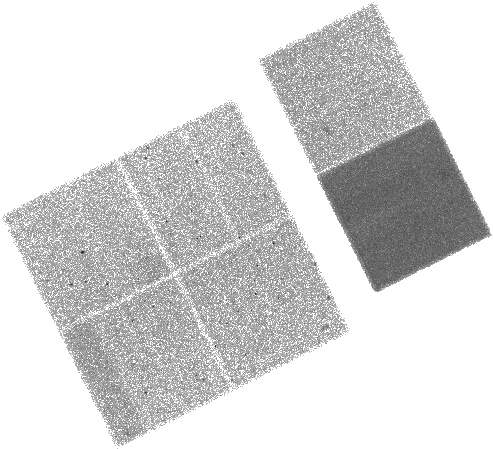

In [27]:
# plot one of the Chandra observation postcards:
from IPython.display import Image
Image(chandra.iloc[5]['postcard_url'])

In [28]:
esasky.closeAllResultPanelTabs()

### Conesearch 

In [34]:
esasky.goToRADec('15 0 0', '-59')
esasky.setFoV(5)

In [20]:
?esasky.coneSearchCatalogues

Signature: esasky.coneSearchCatalogues(missionId, ra, dec, radius)
Docstring:
Overlays availabe catalogues within the specified cone for the specified mission on the sky
 
 Arguments:
ra -- float or string in decimal format
dec -- float or string in decimal format
radius -- float or string in decimal degrees
File:      ~/anaconda3/lib/python3.7/site-packages/pyesasky/pyesasky.py
Type:      method


In [30]:
esasky.coneSearchCatalogues('Herschel-HPPSC-160', '225.0', '-59', 1 )

Catalogs from missionId: Herschel-HPPSC-160 displayed in the ESASky


In [31]:
esasky.coneSearchObservations('Chandra', '225.0', '-59', 1 )

Image observations from missionId: Chandra displayed in the ESASky


In [32]:
esasky.coneSearchSpectra('ISO(IR)', '225.0', '-59', 1 )

Catalogs from missionId: ISO(IR) displayed in the ESASky


In [24]:
esasky.closeAllResultPanelTabs()

### Download data from XMM-Newton in the current FoV

In [35]:
# Plot the XMM-Newton imaging observations in ESASky
esasky.plotObservations('XMM')

Image observations from missionId: XMM displayed in the ESASky


In [36]:
data=esasky.getResultPanelData()
xmm_newton = pd.DataFrame.from_dict(data).transpose()
xmm_newton

,postcard_url,product_url,observation_id,ra_deg,dec_deg,target_name,instrument,start_time,duration,stc_s
0,http://nxsa.esac.esa.int/nxsa-sl/servlet/data-...,http://nxsa.esac.esa.int/nxsa-sl/servlet/data-...,0655020201,224.87415,-60.937,J1459-60,EPIC,2011-02-28 12:57:24.0,44020,POLYGON J2000 224.889571970409 -61.1718366496...
1,http://nxsa.esac.esa.int/nxsa-sl/servlet/data-...,http://nxsa.esac.esa.int/nxsa-sl/servlet/data-...,0400910201,224.4975,-58.43219,G318.9+0.4,EPIC,2006-08-13 12:25:52.0,11921,POLYGON J2000 224.519011892269 -58.6867557197...
2,http://nxsa.esac.esa.int/nxsa-sl/servlet/data-...,http://nxsa.esac.esa.int/nxsa-sl/servlet/data-...,0500630301,227.33083200000002,-58.889694,PSR J1509-5850,EPIC,2008-03-01 21:16:43.0,49814,POLYGON J2000 227.318598669036 -59.1372269238...
3,http://nxsa.esac.esa.int/nxsa-sl/servlet/data-...,http://nxsa.esac.esa.int/nxsa-sl/servlet/data-...,0503320101,224.022,-59.23,AX J145605-5913,EPIC,2007-07-30 07:24:42.0,6918,POLYGON J2000 224.118929488623 -59.4781797405...
4,http://nxsa.esac.esa.int/nxsa-sl/servlet/data-...,http://nxsa.esac.esa.int/nxsa-sl/servlet/data-...,0500630101,227.33083200000002,-58.889694,PSR J1509-5850,EPIC,2008-01-28 06:46:15.0,79949,POLYGON J2000 227.461385545306 -59.1293851344...
5,http://nxsa.esac.esa.int/nxsa-sl/servlet/data-...,http://nxsa.esac.esa.int/nxsa-sl/servlet/data-...,0511010501,223.2054,-59.82167,SAX J1452.8-5949,EPIC,2008-02-07 13:46:24.0,6915,POLYGON J2000 223.291010287531 -60.0657422272...


### Display and get data from external TAPs (Table Access Protocol) 

In [38]:
esasky.goToRADec('150.11917', '+02.20583') #COSMOS Field
esasky.setFoV(0.5)

In [39]:
# View the available predefined external TAP services in ESASky,
# e.g. European Southern Observatory (ESO), MAST (STScI), Canadian 
# Astronomical Data Centre (CADC)
esasky.getAvailableTapServices()

['ESO', 'CADC', 'MAST']

In [40]:
# View all the available external TAP missions:
esasky.getAllAvailableTapMissions()

{'ESO': {'ESO-Images': ['ESO-Images-APEX-12m',
   'ESO-Images-ESO-NTT',
   'ESO-Images-ESO-VISTA',
   'ESO-Images-ESO-VLT-U',
   'ESO-Images-ESO-VST',
   'ESO-Images-NGTS'],
  'ESO-Spectra': ['ESO-Spectra-APEX-12m',
   'ESO-Spectra-ESO-3.6',
   'ESO-Spectra-ESO-NTT',
   'ESO-Spectra-ESO-VISTA',
   'ESO-Spectra-ESO-VLT-U',
   'ESO-Spectra-MPG/ESO-2.2'],
  'ESO-Measurements': ['ESO-Measurements-APEX-12m',
   'ESO-Measurements-ESO-NTT',
   'ESO-Measurements-ESO-VISTA',
   'ESO-Measurements-ESO-VLT-U',
   'ESO-Measurements-ESO-VST',
   'ESO-Measurements-MPG/ESO-2.2',
   'ESO-Measurements-NGTS'],
  'ESO-Cubes': ['ESO-Cubes-ESO-VISTA', 'ESO-Cubes-ESO-VLT-U'],
  'ESO-Visibility': ['ESO-Visibility-ESO-VLTI']},
 'CADC': {'CADC-Images': ['CADC-Images-APASS',
   'CADC-Images-Apache Point',
   'CADC-Images-BLAST',
   'CADC-Images-CFHT 3.6m',
   'CADC-Images-CTIO-1.5m',
   'CADC-Images-DAO',
   'CADC-Images-CGPS',
   'CADC-Images-EVLA',
   'CADC-Images-FUSE',
   'CADC-Images-GEMINI',
   'CADC-Image

In [41]:
# Return the available data in the current field of from ESO (from the ESO TAP):
esasky.getTapServiceCount('ESO')

{'eso-images-eso-vlt-u': 1,
 'eso-measurements-eso-vlt-u': 1,
 'eso-images-eso-vst': 1,
 'eso-measurements-eso-vst': 1,
 'eso-spectra-eso-vlt-u': 1,
 'eso-cubes-eso-vlt-u': 1}

In [42]:
# Plot the footprints and metadata in pyESASky for ESO VLT images in the current FoV 
esasky.plotTapService('eso-images-eso-vlt-u')

Data from TAP: eso-images-eso-vlt-u displayed in the ESASky


In [43]:
data=esasky.getResultPanelData()
vlt = pd.DataFrame.from_dict(data).transpose()
vlt

,abmaglim,access_estsize,access_format,access_url,bib_reference,calib_level,dataproduct_subtype,dataproduct_type,dp_id,em_max,...,s_resolution,s_xel1,s_xel2,snr,t_exptime,t_max,t_min,t_resolution,t_xel,target_name
0,20.554,81875,application/x-votable+xml;content=datalink,http://archive.eso.org/datalink/links?ID=ADP.2...,,2,tile,image,ADP.2016-07-27T12:21:55.204,0.00000214,...,0.386,4529,4529,,2760,54932.04769929,54932.00626906,3579.571872,,COSMOS-deepNB
1,20.393,86371,application/x-votable+xml;content=datalink,http://archive.eso.org/datalink/links?ID=ADP.2...,,2,pawprint,image,ADP.2016-07-27T12:21:55.311,0.00000214,...,0.678,9266,9266,,2760,54936.03616257,54935.99483577,3570.63552,,COSMOS-deepNB
2,20.408,81676,application/x-votable+xml;content=datalink,http://archive.eso.org/datalink/links?ID=ADP.2...,,2,tile,image,ADP.2016-07-27T12:21:55.319,0.00000214,...,0.7,4520,4520,,2760,54936.078177,54936.03675784,3578.615424,,COSMOS-deepNB
3,20.383,81766,application/x-votable+xml;content=datalink,http://archive.eso.org/datalink/links?ID=ADP.2...,,2,tile,image,ADP.2016-07-27T12:21:55.351,0.00000214,...,0.62,4531,4531,,2760,54936.16533742,54936.12380121,3588.728544,,COSMOS-deepNB
4,20.259,85821,application/x-votable+xml;content=datalink,http://archive.eso.org/datalink/links?ID=ADP.2...,,2,pawprint,image,ADP.2016-07-27T12:21:55.459,0.00000214,...,0.569,9284,9284,,1980,54937.12266631,54937.09298937,2564.087616,,COSMOS-deepNB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,20.381,86353,application/x-votable+xml;content=datalink,http://archive.eso.org/datalink/links?ID=ADP.2...,,2,pawprint,image,ADP.2016-07-27T12:21:55.359,0.00000214,...,0.604,9296,9296,,2760,54936.16533742,54936.12380121,3588.728544,,COSMOS-deepNB
207,20.435,81711,application/x-votable+xml;content=datalink,http://archive.eso.org/datalink/links?ID=ADP.2...,,2,tile,image,ADP.2016-07-27T12:21:55.435,0.00000214,...,0.553,4525,4525,,2760,54937.09246801,54937.05108346,3575.62512,,COSMOS-deepNB
208,20.239,81483,application/x-votable+xml;content=datalink,http://archive.eso.org/datalink/links?ID=ADP.2...,,2,tile,image,ADP.2016-07-27T12:21:55.451,0.00000214,...,0.593,4527,4527,,1980,54937.12266631,54937.09298937,2564.087616,,COSMOS-deepNB
209,20.695,81552,application/x-votable+xml;content=datalink,http://archive.eso.org/datalink/links?ID=ADP.2...,,2,tile,image,ADP.2016-07-27T12:21:55.467,0.000002307,...,0.577,4524,4524,,720,54937.13475291,54937.12320744,997.528608,,COSMOS-deepNB


In [44]:
esasky.closeAllResultPanelTabs()

<br />
<p style="font-weight: bold;text-align: center;font-size: 2.0em;color: #00338D">Cross-match catalogues using astropy</p>

### Cross-match the two catalogues using astropy.coordinates

In [45]:
from astropy.coordinates import SkyCoord
from astropy.coordinates import ICRS, Galactic, FK4, FK5
from astropy import units as u

In [46]:
ra1 = xmmepic['ra']
dec1 = xmmepic['dec']
ra2 = HPPSC100['ra']
dec2 = HPPSC100['dec']
c = SkyCoord(ra1, dec1, frame='icrs', unit='deg')
catalog = SkyCoord(ra2, dec2, frame='icrs', unit='deg')
idx, d2d, d3d = c.match_to_catalog_sky(catalog)

In [47]:
# Set a maximum separation as 5 arcseconds
max_sep = 5.0 * u.arcsec
idx, d2d, d3d = c.match_to_catalog_3d(catalog)
sep_constraint = d2d < max_sep
c_matches = c[sep_constraint]
catalog_matches = catalog[idx[sep_constraint]]
catalog_matches
#catalog_matches

<SkyCoord (ICRS): (ra, dec) in deg
    [(150.22365804, 2.10558539), (150.13814828, 2.2915237 ),
     (150.0620162 , 2.45481604), (150.04586966, 2.10833129),
     (150.17580123, 2.4038196 ), (150.07346567, 2.34640057),
     (150.17919592, 2.11028374), (150.19486106, 2.00481937),
     (150.17919592, 2.11028374), (150.13814828, 2.2915237 ),
     (150.07907042, 2.26618761), (150.14270206, 2.05077628),
     (150.0620162 , 2.45481604), (150.0558229 , 2.23328241),
     (150.12352427, 2.35821883), (150.15774732, 2.13979568),
     (150.19486106, 2.00481937), (150.12352427, 2.35821883),
     (150.05067549, 2.30581431), (150.09552144, 2.22001561),
     (150.22365804, 2.10558539), (150.20978793, 2.24946686),
     (150.11950782, 2.29566352), (150.1942461 , 2.06807927),
     (150.01829771, 2.35005804), (150.18659166, 2.45506715),
     (150.07346567, 2.34640057), (150.0620162 , 2.45481604),
     (150.1942461 , 2.06807927), (150.22992128, 2.3958995 ),
     (150.13814828, 2.2915237 ), (150.1942461 , 2.

In [48]:
# Convert the SkyCoord column to an astropy table 
# and add a Name column (for pyESASky)
from astropy.table import Table
import numpy as np
XMMEPIC_HPPSC100 = Table()
XMMEPIC_HPPSC100['ra'] = catalog_matches.ra
XMMEPIC_HPPSC100['dec'] = catalog_matches.dec
XMMEPIC_HPPSC100['Name'] = np.linspace(1, catalog_matches.size, catalog_matches.size)
XMMEPIC_HPPSC100

ra,dec,Name
deg,deg,
float64,float64,float64
150.223658044377,2.10558538944994,1.0
150.13814827609,2.29152369815127,2.0
150.062016196925,2.45481604391819,3.0
150.045869657262,2.1083312865614,4.0
150.175801227365,2.40381960168868,5.0
150.073465672486,2.34640057347026,6.0
150.179195921697,2.11028374481469,7.0
150.19486105997,2.00481937123556,8.0


<br />
<p style="font-weight: bold;text-align: center;font-size: 2.5em;color: #00338D">Send your data to ESASky</p>

## Send the cross-matched table to ESASky

In [49]:
# overlayCatalogueFromAstropyTable('<catName>', '<cooFrame>', <color>, <lineWidth>, <table>, '<raColname>', '<decColname>', '<mainIDColname>')
# where:
# - <catName> : name of the catalogue that will be used in pyESASky as label
# - <cooFRAME> : coordinate frame
# - <color> : HTML color. It could be a "Color name", "Hex color code" or "RGB color code"
# - <lineWidth> : width used to draw sources. From 1 to 10
# - <table> : name of the column containing a unique identifier for sources if any. None if not applicable
# - <raColname> : name of the RA column in degrees
# - <decColname> : name of the Dec column in degrees
# - <mainIDColname> : name of the column with the name of the source

esasky.overlayCatalogueFromAstropyTable('XMMEPIC_HPPSC100', 'J2000', '#ffff00', 10, XMMEPIC_HPPSC100, 'ra','dec','Name')

## Send a catalogue in VizieR to ESASky

In [50]:
import astropy

In [ ]:
# Import the VizieR astroquery module
from astroquery.vizier import vizier

In [ ]:
# Query the Véron-Cetty+ 2010 catalogue, VII/258/vv10, for the 
# Cosmos field with search radius 0.5 degrees
result = Vizier.query_region("Cosmos Field", 
                             radius=0.5*u.deg, catalog='VII/258/vv10')
print(result)

In [ ]:
Veron = result['VII/258/vv10']
Veron

In [ ]:
#transform the RA and Dec to degrees and add two new columns
c = SkyCoord(Veron['RAJ2000'], Veron['DEJ2000'], unit=(u.hourangle, u.deg))
Veron['RAJ2000'] = c.ra
Veron['DEJ2000'] = c.dec
Veron

In [ ]:
# Send the catalogue to ESASky
esasky.overlayCatalogueFromAstropyTable('Veron', 'J2000', '#33c9cc', 5, Veron, 'RAJ2000', 'DEJ2000','Name')

You can also upload your own tables from files or create your own tables and send them to ESASky.

## Send Footprints to ESASky

In [44]:
# Go to anoter region in the sky, set the Fov and change HiPS to Spitzer
esasky.goToTargetName('[SPK2012] MWP1G300134-001035')
esasky.setFoV(2.3)
esasky.setHiPS("Spitzer cold SEIP IRAC-1-3-4 RGB bright")
#esasky.setHiPS("Spitzer", "http://cdn.skies.esac.esa.int/Spitzer/IRAC134_RGB_bright/")

In [45]:
footprintDesc = FootprintSetDescriptor('test footprints', 'red', 5, 'id', 'id', 'stcs', 'ra', 'dec', [])

In [46]:
esasky.overlayFootprintsFromCSV('./testfootprint.csv', ',', footprintDesc)

Columns identified: id, ra, dec, wid, hei, stcs, score
{id} mapped to id
{name} mapped to id
{centerRaDeg} mapped to ra
{centerDecDeg} mapped to dec
{stcs} mapped to stcs
Processed 27 lines.


In [47]:
esasky.closeAllResultPanelTabs()

## Send your own HiPS to ESASky

This will start a tornado server opening up a port allowing web browser access to this path and all folders/files underneath

In [ ]:
esasky.goToRADec('266.41683', '-29.00781')
esasky.setFoV(90)
esasky.addHiPS("MyLocalHiPS", "/Users/dbaines/Downloads/LFI_SkyMap_030_1024_R3.00_full_HiPS/")
esasky.setHiPSColorPalette('PLANCK')
esasky.openSkyPanel()

In [ ]:
#Stop the tornado server:
esasky.httpserver.stop()

<br />
<p style="font-weight: bold;text-align: center;font-size: 2.5em;color: #00338D">Interacting with other ESASky Functionalities</p>

## Sliding through different HiPS

In [65]:
# Go to Seyfert 2 Galaxy Centaurus A
esasky.goToRADec(201.365063, -43.019113)
esasky.setFoV(0.2)

Add HiPS to the sky panel

In [10]:
esasky.addHiPS("Chandra RGB")
esasky.addHiPS("XMM-Newton EPIC color")
esasky.addHiPS("DSS2 Color")
esasky.addHiPS("2MASS color JHK")
esasky.addHiPS("Spitzer cold SEIP IRAC2 faint")
esasky.addHiPS("Herschel PACS RGB 70, 160 micron")

No HiPS called: Chandraa RGB found. Try getAvailableHiPS() for existing HiPS names


Animations can be made programmatically using this slider function

In [67]:
import time
for i in range(500):
    esasky.setHiPSSliderValue(i/100.0)
    time.sleep(0.02)

We can even create a slider in the python interface to control the HiPS

In [68]:
import asyncio
nSkies = esasky.getNumberOfSkyRows()
def wait_for_change(widget, value):
    future = asyncio.Future()
    def getvalue(change):
        future.set_result(change.new)
        widget.unobserve(getvalue, value)
    widget.observe(getvalue, value)
    return future

from ipywidgets import FloatSlider
slider = FloatSlider(min=0.0, max=nSkies-1, step=0.01,  continuous_update=True)

async def f():
    while True:
        x = await wait_for_change(slider, 'value')
        esasky.setHiPSSliderValue(x)
asyncio.ensure_future(f())

slider

FloatSlider(value=0.0, max=6.0, step=0.01)

## Interacting with the JWST Planning Tool

### Open the JWST Planning Tool and add an instrument at specific coordinates

In [4]:
esasky.closeSkyPanel() #first, close the sky panel
esasky.addJwstWithCoordinates("NIRSPEC", "NRS_FULL_MSA", False, "201.365063", "-43.019113", "5")

No detector with that name exists. Available detectors for instrument: NIRSPEC are: [NRS_FULL_MSA, NRS_FULL_MSA1, NRS_FULL_MSA2, NRS_FULL_MSA3, NRS_FULL_MSA4, NRS_FULL_IFU, NRS_S200A1_SLIT, NRS_S200A2_SLIT, NRS_S200B1_SLIT, NRS_S400A1_SLIT, NRS_S1600A1_SLIT,]


### Add an instrument at the centre of the screen and include all instruments in the focal plane

In [7]:
esasky.setFoV(0.5)
esasky.addJwst("NIRCam", "NRCB5_MASK430R", True) 

Showing instrument in the sky


In [63]:
esasky.closeJwstPanel()

In [58]:
esasky.openJwstPanel()

In [64]:
esasky.clearJwstAll()
esasky.closeJwstPanel()

## Coordinates Grid

The latest version of ESASky includes a coordinates grid which can be switched on and off:

In [53]:
esasky.goToRADec(350.850, +58.815) #Cas A
esasky.setFoV(0.2)

In [54]:
esasky.setHiPS('Chandra RGB')
esasky.showCoordinateGrid(True)

In [55]:
esasky.showCoordinateGrid(False)

## Healpix MOCs

Display your own MOCs on the sky using IVOA string or JSON notation

In [ ]:
esasky.overlayMOC('6/2-15 23 554 7/22 50-75', 'myMoc', 'blue', 0.2)

In [ ]:
esasky.overlayMOC('{"3":[1,2,3,4,5], "4":[26,27]}', 'myMoc2', '#FF1244', 1)

In [ ]:
esasky.removeMOC('myMoc')
esasky.removeMOC('myMoc2')